# Reading some temperature data

Hoy veremos nociones muy muy basicas de estadisticas para poder hacer analysis de climatologia.

Para hacer estadistica utilizaremos 3 librerias de python: `numpy`, `pandas` y `scipy`

y la libreria para hacer graficas: `matplotlib`

Primeros, sino estans instalados en la terminal ejecutar los comandos siguientes:

    conda install -c conda-forge scipy 
    
    conda install -c anaconda pandas 
     
    conda install -c anaconda numpy 
    
    conda install -c conda-forge matplotlib 
    
    conda install -c anaconda scikit-learn 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#here are the line of code to extract the grid point of barcelona from the original file (just for your information)
#import cdo as cdop
#cdo=cdop.Cdo()
#cdo.copy(input="-del29feb -remapnn,lon=2.2_lat=41.4 tx_ens_mean_0.25deg_reg_v19.0e.nc", output="TmaxBCN.nc")
#cdo.showdate(input="TmaxBCN.nc")

In [3]:
from netCDF4 import Dataset as nc #import netcdf library
fileTmax = nc("TmaxBCN.nc", "r") # open the netcdf file
tmax = fileTmax.variables.get("tx")[:] #read the variable
TmaxBCN=np.array(tmax[:,0,0])
fileTmax.close()

In [4]:
len(TmaxBCN)

25185

# Como podemos extraer informacion de "tantos" datos?

## Pues con estadistica....

## Numpy introduction 

In [5]:
type(TmaxBCN)

numpy.ndarray

es un numpy array... un numpy array es un poco como una lista pero muchissimo mas potente y adecuado para la analysis estatistica.

comando basico, mirar la forma, hoy nos quedaremos una sola dimension, pero mas adelante trabajaremos con mas dimensiones

In [8]:
TmaxBCN.shape[0], len(list(TmaxBCN))

(25185, 25185)

numpy tien toda una serie de funciones muy practicas, uno ejemplos

print(np.sum(TmaxBCN)) # hace la suma
print(np.mean(TmaxBCN)) # hace media
print(np.min(TmaxBCN)) #calcula el min
print(np.max(TmaxBCN)) #calcula el min
print(np.argmin(TmaxBCN)) #devuelve la position del min
print(np.argmax(TmaxBCN)) # devuelve la position de max



una cosa muy practica de numpy es que se puede selecionar muy facilmente "trossos" del array

In [9]:
print(TmaxBCN[5:10]) #seleciona los valores que tienes las posiciones de 5 a 10
print(TmaxBCN[[6,7,33,60,1000]]) #seleciona los valores que tienes las posiciones 6,7,33,60,1000

[14.5  14.16 12.71 13.53 15.58]
[14.16     12.71     14.299999 11.95     19.96    ]


tambien se pueden hacer operaciones matematicas muy facilmente

In [10]:
TmaxBCN[5:10]+273.15  # para convertir en Kelvin

array([287.65   , 287.31   , 285.86   , 286.68   , 288.72998],
      dtype=float32)

In [11]:
TmaxBCN[5:10]*2  

array([29.  , 28.32, 25.42, 27.06, 31.16], dtype=float32)

In [12]:
TmaxBCN[5:10]+np.array([11,12,16,17,18])

array([25.5       , 26.15999985, 28.71000004, 30.52999973, 33.57999992])

Otro cosa muy practica es que se puede encontrar muy facilmente elementos que verifican una condicion

In [13]:
print(np.where(TmaxBCN>37)) #devuelve las posiciones de todas las valores >37ºC 
# cuidado estas posiciones estan guardada en una lista que contiene un numpy array 
#por cada dimension del array que pasamos en argumento


(array([19563, 19568, 19569, 22138, 25035, 25036]),)


I para buscar los valores correspondientes

In [14]:
print(TmaxBCN[np.where(TmaxBCN>37)]) 

[37.3  37.07 38.14 38.   37.36 37.19]


In [77]:
type(np.where(TmaxBCN>37)), 

(tuple,)

## Basic statistic for climatology

primero hechamos un viztazo a esta serie para esto utilizaremos la libreria matplotlib

In [15]:
%matplotlib inline

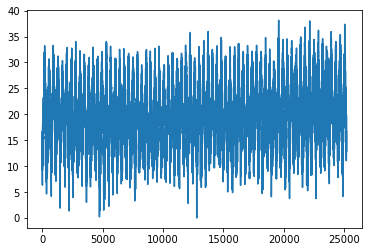

In [16]:
plt.plot(TmaxBCN)

aqui vemos tres fluctuaciones importantes el ciclo estacional y la señal del calentamiento global y mucho ruido

podemos calcular dos valores que no ayudan a caracterisar esta serie: 
    la media: 
    $$\bar{x} = \frac{1}{n}\sum_{i=0}^{n} x_i $$
    y la deviation estandard: 
    $$ \sigma = \sqrt{\frac{1}{n}\sum_{i=0}^{n} (x_i - \bar{x})^2} $$ 
    esta ultima quantitad representa la variation typica alrededor de la media

In [17]:
meantmax = np.mean(TmaxBCN)
stdtmax = np.std(TmaxBCN)
print(meantmax, stdtmax)

20.074553 6.157825


(array([0.0002081 , 0.00010405, 0.        , 0.00031216, 0.00041621,
        0.00052026, 0.00031216, 0.00031216, 0.00010405, 0.00062431,
        0.00083241, 0.00083241, 0.00083241, 0.00114457, 0.00176888,
        0.00249724, 0.00176888, 0.00270535, 0.0032256 , 0.00384992,
        0.00509854, 0.00697146, 0.00936468, 0.00822009, 0.01186193,
        0.01644017, 0.01945767, 0.02091445, 0.02788586, 0.02590894,
        0.03163172, 0.03860319, 0.0422451 , 0.04775974, 0.04942469,
        0.06003784, 0.06066215, 0.05972583, 0.05618793, 0.05889342,
        0.05806086, 0.0605581 , 0.05650022, 0.06284739, 0.05525132,
        0.05691643, 0.05254625, 0.05649994, 0.04952874, 0.05171383,
        0.04828012, 0.04515833, 0.04307752, 0.04640718, 0.04495023,
        0.04141269, 0.04859227, 0.04442997, 0.04588692, 0.0422451 ,
        0.04869632, 0.04203679, 0.04713555, 0.04474235, 0.04110033,
        0.04338967, 0.04578287, 0.04266131, 0.0463029 , 0.04734365,
        0.04911253, 0.04432592, 0.04932064, 0.04

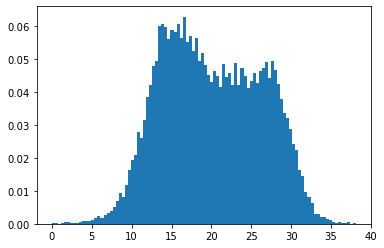

In [23]:
plt.hist(TmaxBCN, 100, density=True)


en estadistica la vida es bastante mas facil cuando las distribuciones son gaussianes

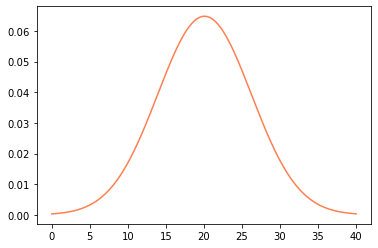

In [24]:
# plot a gaussian distribution 

x_min = 0.0
x_max = 40

mean = meantmax 
std = stdtmax

x = np.linspace(x_min, x_max, 2000)

y = stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral')

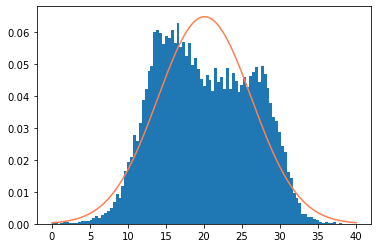

In [25]:
plt.hist(TmaxBCN, 100, density=True)
plt.plot(x,y, color='coral')

y no es nuestro caso.... 

### Ciclo estacional 

aqui hemos quitado de la serie temporal los 29 de febrero para simplifacar nos la vida.

Para estimar el ciclo estacional, lo que hacemos en general es calcular por cada dia (o 6h, o mes, o semana, segon la frequencia con la cual trabajamos) la media sobre todos los años.

Para hacer esto empezamos por ordenar los datos de una manera mas practica: 2 dimensions dia x años


In [26]:
ndays = 365
nyear = int(TmaxBCN.shape[0]/ndays)

In [27]:
#cambiamos la organizacion de los datos
TmaxResh = np.array(TmaxBCN)
TmaxResh.shape = (nyear, ndays)
TmaxResh.shape

(69, 365)

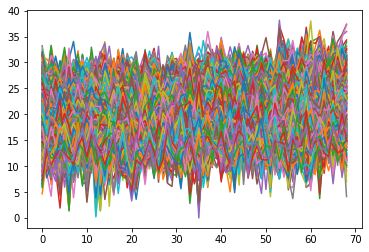

In [30]:
plt.plot(TmaxResh)

Y ahora haremos la media por cada dia de todos los años

In [31]:
seascycle = np.mean(TmaxResh, axis=0)
seascycle.shape

(365,)

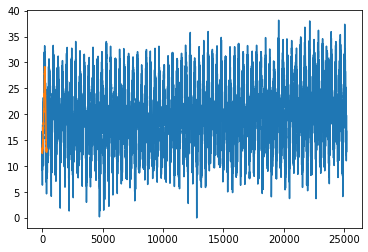

In [32]:
plt.plot(TmaxBCN)
plt.plot(seascycle)

Y para repetir los (para poder comparar con la serie original)

In [33]:
# esto es una option para extender un array utilizando numpy
seascycle_ally = np.ravel(np.repeat(seascycle[np.newaxis, :], nyear, axis=0))
#otra ocion es convertir lo en lista
seascycle_ally = np.array(list(seascycle)*nyear)

In [34]:
seascycle_ally.shape

(25185,)

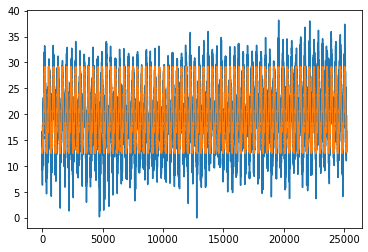

In [35]:
plt.plot(TmaxBCN)
plt.plot(seascycle_ally)

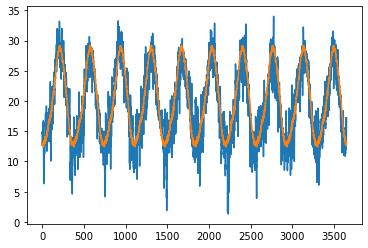

In [38]:
plt.plot(TmaxBCN[0:365*10])
plt.plot(seascycle_ally[0:365*10])

### Anomalies 

la senyal del ciclo estacional es tan fuerte que no nos deja ver claramente otras senyales. En general cuando se quiere analisar otras frequencias (interanual, intraestacional, multi decadal, tendencia) lo primero que hacemos es quitar lo y trabajar con la anomalias.

In [39]:
#calcular anomalias
anom = TmaxBCN -seascycle_ally

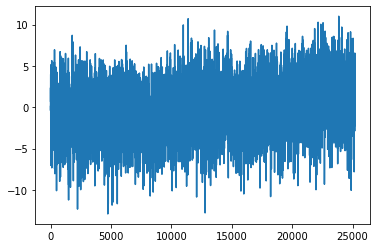

In [40]:
plt.plot(anom)

(array([0.00033233, 0.00016616, 0.00016616, 0.        , 0.00016616,
        0.00066465, 0.00016616, 0.00033233, 0.00049849, 0.00066466,
        0.00066465, 0.00083082, 0.00066465, 0.00116314, 0.00199397,
        0.00083082, 0.00132931, 0.00132931, 0.00249245, 0.00299096,
        0.00415409, 0.00382177, 0.00564956, 0.00648039, 0.00614806,
        0.01046833, 0.01113298, 0.0104683 , 0.01096682, 0.01462242,
        0.01395777, 0.01927497, 0.02276445, 0.0262539 , 0.02708472,
        0.0305741 , 0.03805153, 0.04702438, 0.04951679, 0.04868602,
        0.0682933 , 0.0824173 , 0.07477368, 0.08407893, 0.0962088 ,
        0.10435093, 0.11083127, 0.12046877, 0.13891295, 0.13791597,
        0.13808213, 0.14821813, 0.16267439, 0.15519701, 0.15420003,
        0.16500067, 0.1566925 , 0.15536317, 0.15652628, 0.14855046,
        0.13658666, 0.12379205, 0.11149598, 0.10501548, 0.08723605,
        0.08740213, 0.07294595, 0.0641392 , 0.06114832, 0.05300623,
        0.04635973, 0.03904852, 0.03323271, 0.02

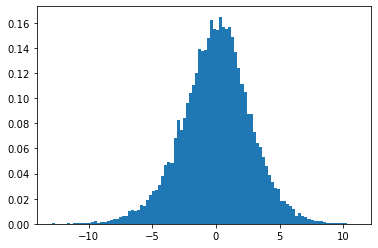

In [41]:
plt.hist(anom, 100, density=True)

eso si que es mucho mas similar a una distribucion gaussiana, utilizando la function fit podemos buscar la distrbicion gaussiana mas similar. Basicamente es lo mismo que calcular la media y la deviation estandard.

In [42]:
mean,std=stats.norm.fit(anom)
mean,std

(1.4540835e-07, 2.7068193)

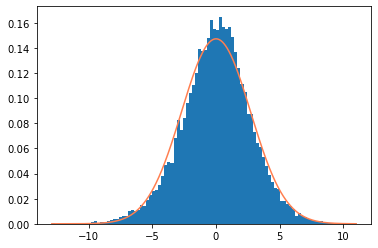

In [43]:
plt.hist(anom, 100, density=True)
x = np.linspace(np.min(anom), np.max(anom), 2000)

y = stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral')

In [ ]:
y

### Percentiles

Una otra manera de mirar la distribucion de una serie es el diagrama de caja (boxplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f320c089f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f320c099668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f320c089c88>],
 'medians': [<matplotlib.lines.Line2D at 0x7f320c099cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f320c0a4080>],
 'means': []}

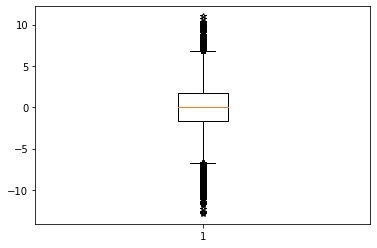

In [44]:
plt.boxplot(anom, sym="*")

la primera lina representa el quantile 5 (5% de las valores mas pequeñas), la siguiente el quantile 25 (25% de las valores mas pequeñas), la linea naranja la mediana (50% de las valores mas pequeñas), la siguiente el quantile 75 (75% de las valores mas pequeñas) la ultima linea es el quantile 95 (95% de las valores mas pequeñas). 

las estrellitas son por las valores extremas (es decir el 5% de valores mas alta y el 5% de valores mas pequeña).

Con numpy es muy facil calcular estos valores

In [71]:
per = np.percentile(anom, [5, 25, 50, 75, 95])
per

array([-4.5444622 , -1.66014862,  0.07072067,  1.72058296,  4.33634796])

se pueden tambien calcular otros percentiles, como les 95, 90, 5 y 10 que corresponden a valores mas extremos


In [46]:
np.percentile(anom, [5, 10, 90, 95])

array([-4.5444622 , -3.35785599,  3.33156548,  4.33634796])

Tambien se puede calcular el percentile correspondiente a una valor

In [47]:
thres = std
100-float(np.sum((anom > thres)))/anom.shape[0]*100

85.36430414929521

In [53]:
float(np.sum(anom > 4))/(anom.shape[0])

0.06352987889616836

### Tendancia

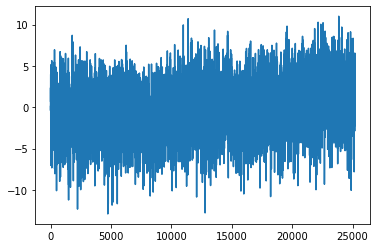

In [54]:
plt.plot(anom)

veis que haqui hay mucho "ruido", variabilitad de un dia al otro, una manera de "filtrar" este ruido, de manera muy sencilla, es haciendo una media. Por ejemplo podemos hacer la media anual (pero puede ser mensual, semanal... segon el caso que nos interesca).

In [55]:
#cambiamos la organizacion de los datos
anomResh = np.array(anom)
anomResh.shape = (nyear, ndays)

In [56]:
anomResh.shape

(69, 365)

In [57]:
# y ahora hacemos la media
anomyear = np.mean(anomResh, axis = 1)
print(anomyear.shape)

(69,)


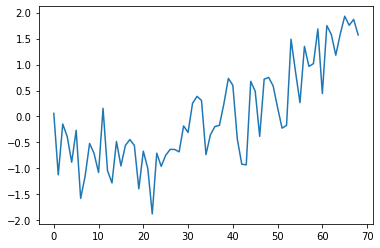

In [58]:
plt.plot(anomyear)

Vemos que la media annual de la temperaturas  va subiendo (cambio climatico). Podemos estimar esta tendancia haciendo una regression lineal. 

Esta pagina lo explica todo muy bien: https://realpython.com/linear-regression-in-python/

basicamente lo que queremos hacer es estimar la function: $$y = a*x + b$$ mas parecida a nuestra serie x siendo los años.

In [59]:
x = np.arange(len(anomyear)) # primero creamos el vector x que contiene todos los años
model = LinearRegression() # creamos una instancia de la classe linear regression
# hacer el fit (los argumentos tienen que ser 2D, añadimos una dimension extra de talla 1)
model.fit(x[:, np.newaxis], anomyear[:,np.newaxis]) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
x[:, np.newaxis].shape

(69, 1)

In [64]:
print("el coeficient es: %f" % model.coef_)
print("el intercept es: %f" % model.intercept_)


el coeficient es: 0.037578
el intercept es: -1.277668


In [65]:
model.predict(x[:, np.newaxis]).shape

(69, 1)

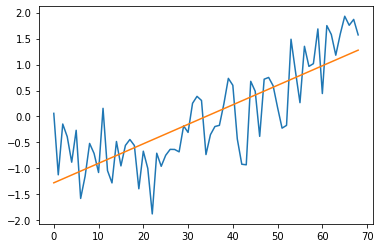

In [66]:
plt.plot(anomyear)
plt.plot(x,model.predict(x[:, np.newaxis]))

Con esto podriamos predecir la temperatura meda del año que viene?

In [67]:
pred = model.predict(np.array([70,71])[:,np.newaxis])

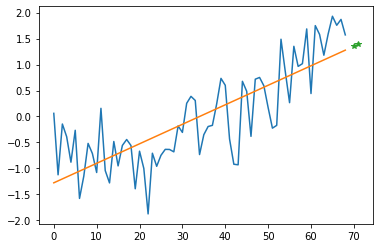

In [68]:
plt.plot(anomyear)
plt.plot(x,model.predict(x[:, np.newaxis]))
plt.plot([70,71],pred[:,0], "*")


Tambien como con la climatologia podemos quitar la tendancia, utilizando los residuos de esta regresion.

In [69]:
linearreg = model.predict(x[:, np.newaxis])[:,0]

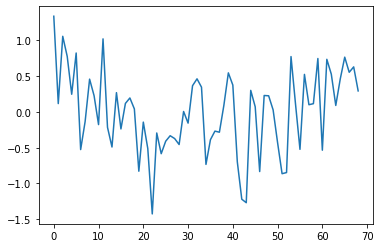

In [70]:
anomdetrend = anomyear - linearreg
plt.plot(anomdetrend)